# Problematica y Datos

El siguiente proyecto trata de predecir, dar la probabilidad de de una persona deje/renuncie la compañia.

Objetivos de RRHH:
1. Reclutar a las personas correctas para la empresa.
2. Retener el talento humano importante en la empresa.

Premisas:
Realizar un proceso de contratación es sumamente caro, tanto en tiempo y dinero.
Al momento de abrir un proceso de contratación, llegan infindad de curriculums, y no podemos entrevistar a todos.

"Las  empresas gastan al rededor del 15-20% del salario anual de la posición, durante el proceso de contratación."


# Librerias

In [1]:
#Liberias Básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#librerias de machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

# Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/7r1b0l1/DS-Projects/main/Human_Resources.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
pd.options.display.max_columns = 0
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Preparacion para Visualizacion de datos

In [8]:
#Las variables categoricas debemos clasificarlas con números para poder hacer las visualizaciones. 

sino = {"Yes":1,"No":0,"Y":1,}
df["Attrition_binario"] = df["Attrition"].map(sino)
df["Over18_binario"] = df["Over18"].map(sino)
df["OverTime_binario"] = df["OverTime"].map(sino)

df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_binario,Over18_binario,OverTime_binario
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0


<AxesSubplot:>

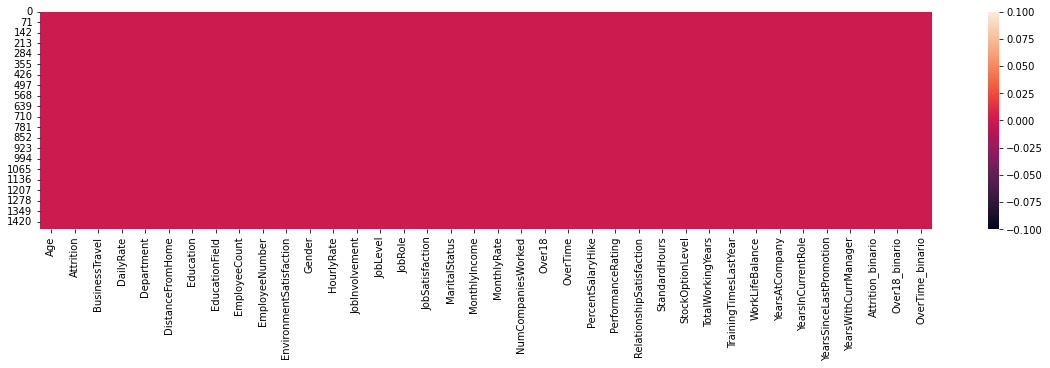

In [9]:
#Anteriormente en df.info() se evidenció que no tenemos valor nulos. OK
plt.figure(figsize=(20,4))
sns.heatmap(df.isna())

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Visualizacion de datos

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

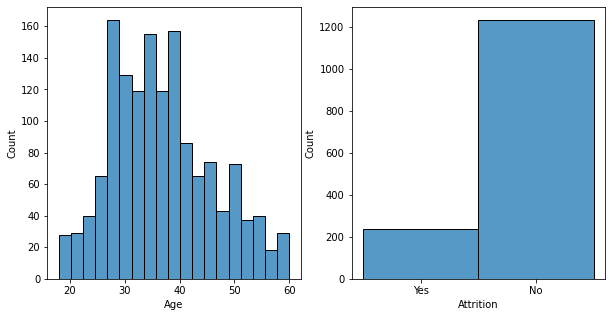

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="Age")
plt.subplot(1,2,2)
sns.histplot(data=df, x="Attrition")

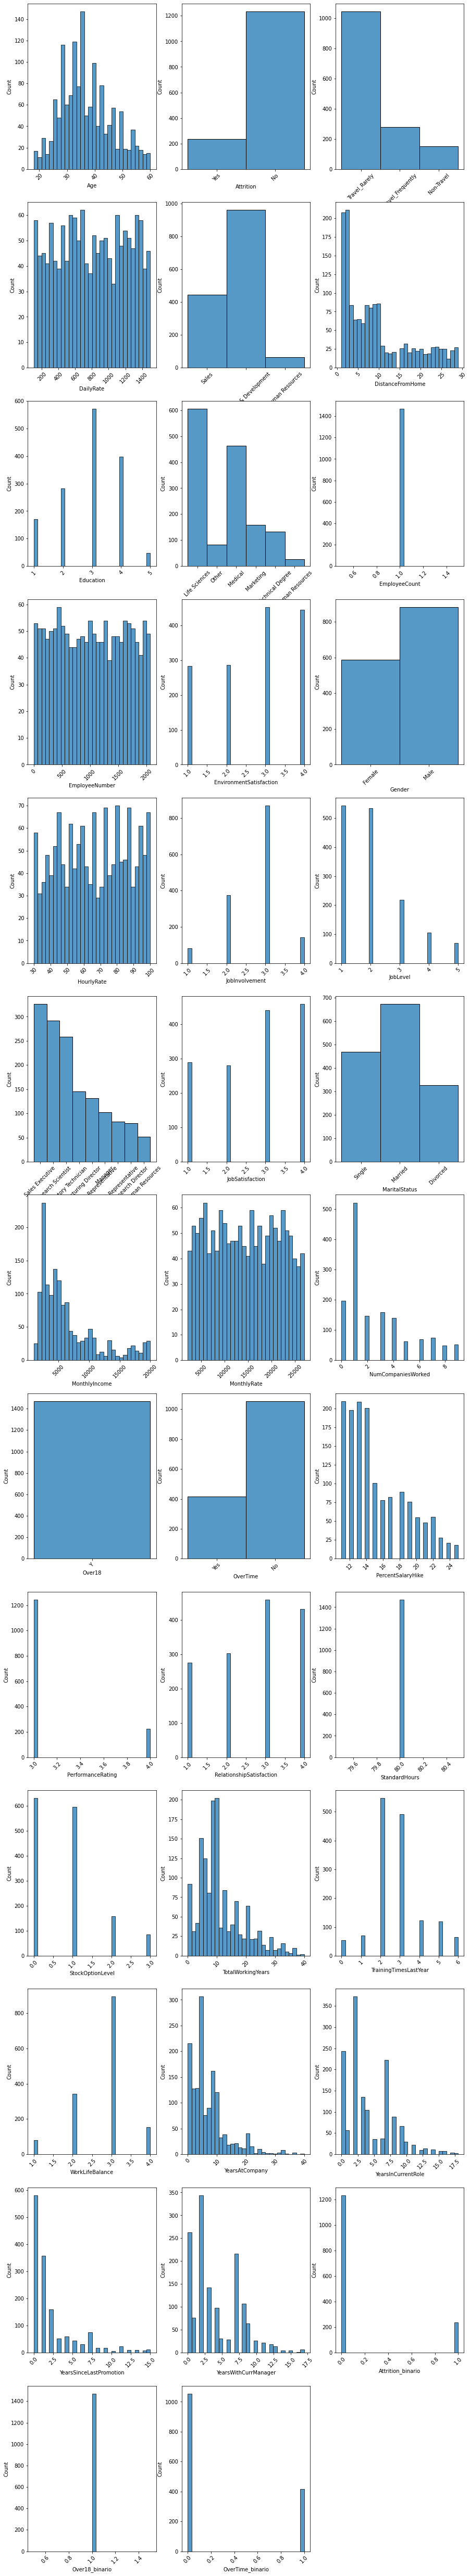

In [12]:
features = list(df.columns)
plt.figure(figsize=(15,90))
for i in enumerate(features):
    plt.subplot(13,3,i[0]+1)
    sns.histplot(data=df, x=i[1], bins=30)
    plt.xticks(rotation=45)

#df.hist(bins=30, figsize=(20,20), color="r")

In [13]:
#vamos anular aquellas columnas que no suman información relevante para el modelo y/o análisis
df.drop(columns=["Over18","Over18_binario","EmployeeCount","StandardHours","EmployeeNumber"],inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_binario,OverTime_binario
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,0,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0,1
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,0,0


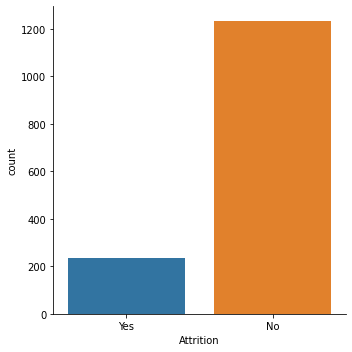

In [14]:
#vamos analizar primero la proporcion de los datos sobre la variable dependiente "Attrition"
df["Attrition"].value_counts
sns.catplot(data=df,x="Attrition",kind="count",legend=True)

In [15]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
porc= round(df["Attrition"].value_counts()[1]/(df["Attrition"].value_counts()[0]+df["Attrition"].value_counts()[1])*100,2)
print(f'{porc}% del total de registros es de personas que se retiran de la empresa, esto es poco para entrenar el modelo')

16.12% del total de registros es de personas que se retiran de la empresa, esto es poco para entrenar el modelo


<AxesSubplot:>

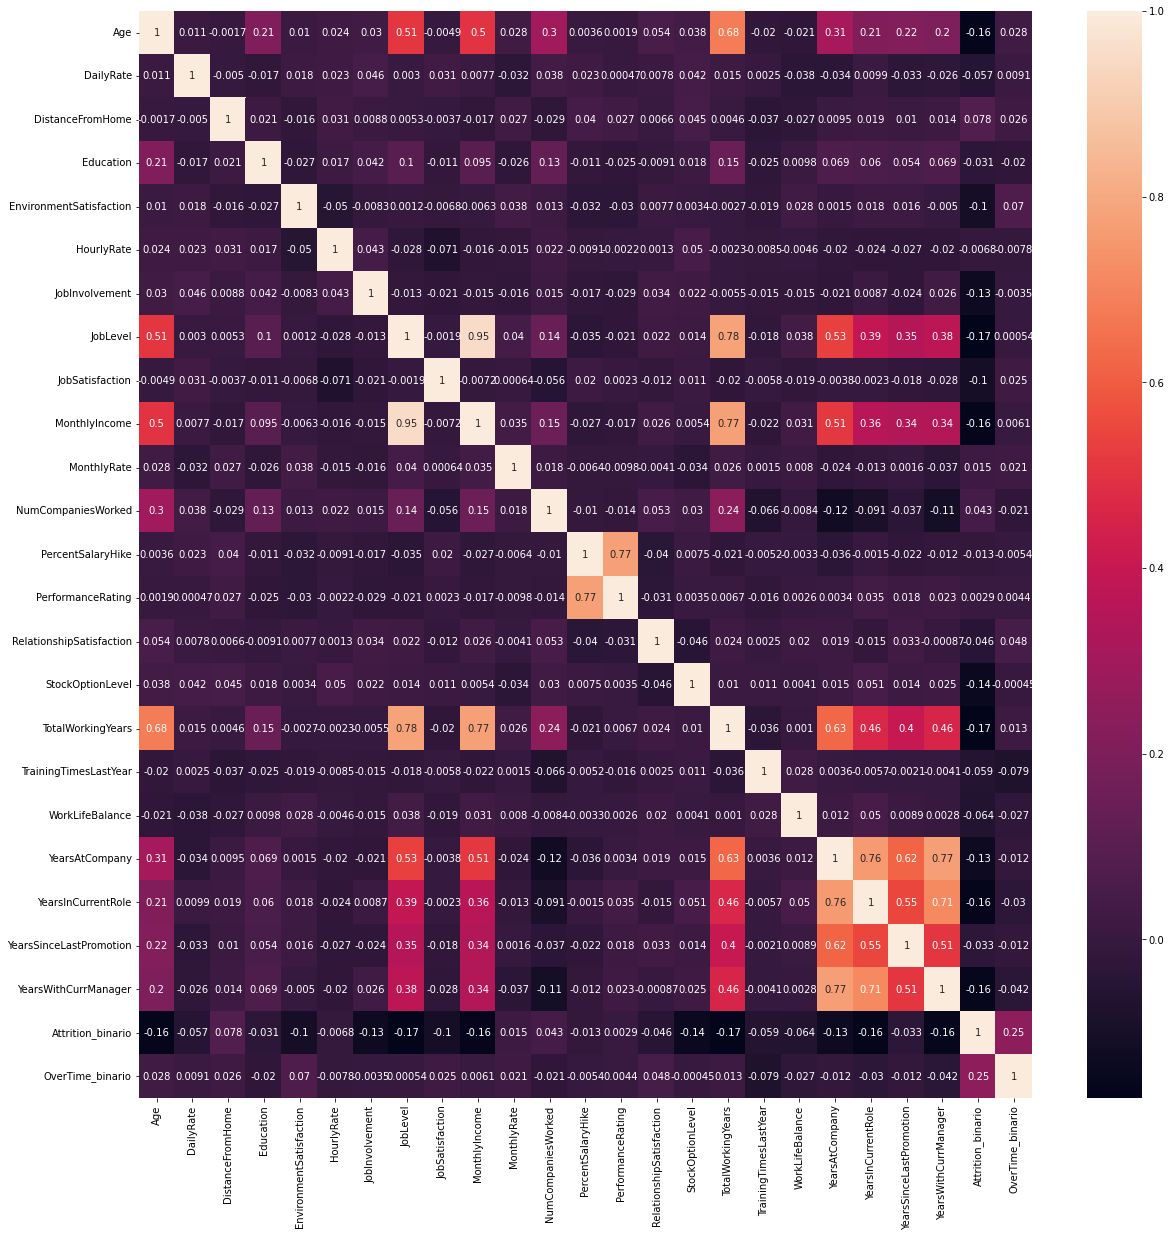

In [17]:
#vamos a revisar la relación entre variables, a fin de identificar si alguna es redundante y poder anularla.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

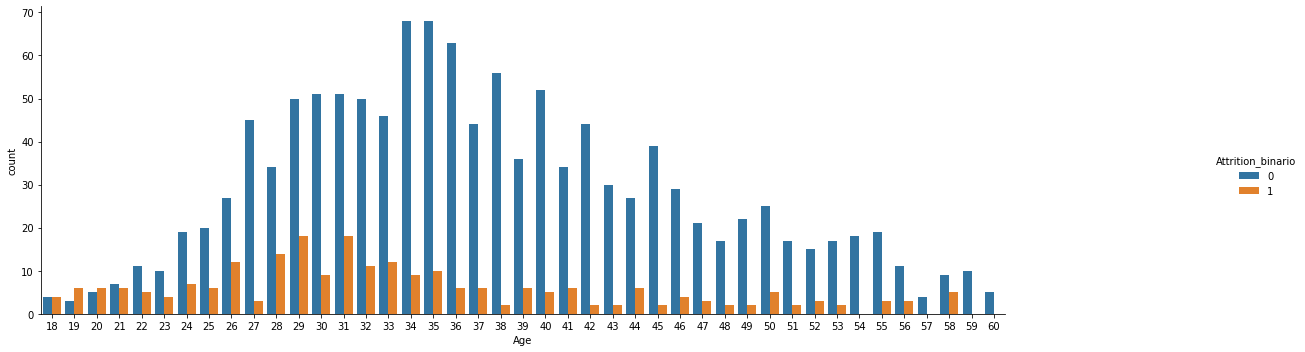

In [18]:
sns.catplot(data=df,kind="count",x="Age",hue="Attrition_binario")
plt.gcf().set_size_inches(20, 5)
#la gente que más se va de la empresa esta entre 29-31 años de edad

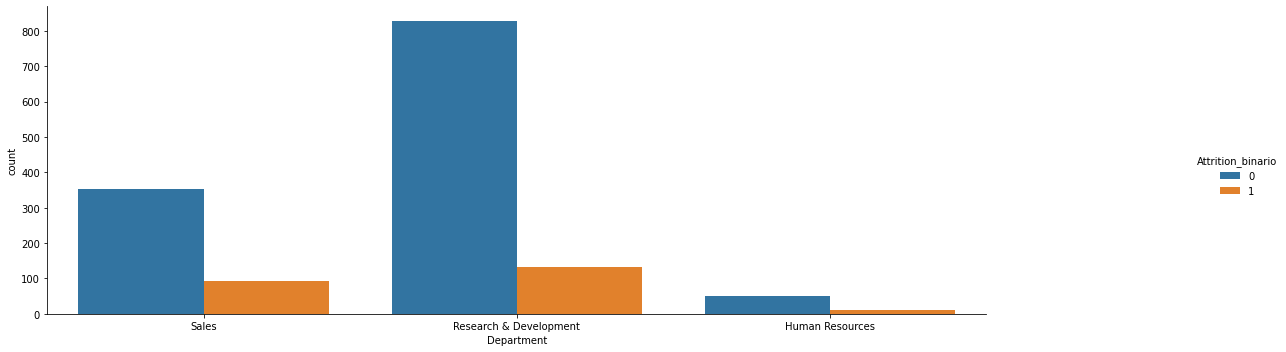

In [19]:
sns.catplot(data=df,kind="count",x="Department",hue="Attrition_binario")
plt.gcf().set_size_inches(20, 5)
#el área que mas ratacion tiene es ventas

In [20]:
d = df.groupby(["Department","JobRole"]).mean()
d["Attrition_binario"]*100

Department              JobRole                  
Human Resources         Human Resources              23.076923
                        Manager                       0.000000
Research & Development  Healthcare Representative     6.870229
                        Laboratory Technician        23.938224
                        Manager                       5.555556
                        Manufacturing Director        6.896552
                        Research Director             2.500000
                        Research Scientist           16.095890
Sales                   Manager                       5.405405
                        Sales Executive              17.484663
                        Sales Representative         39.759036
Name: Attrition_binario, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

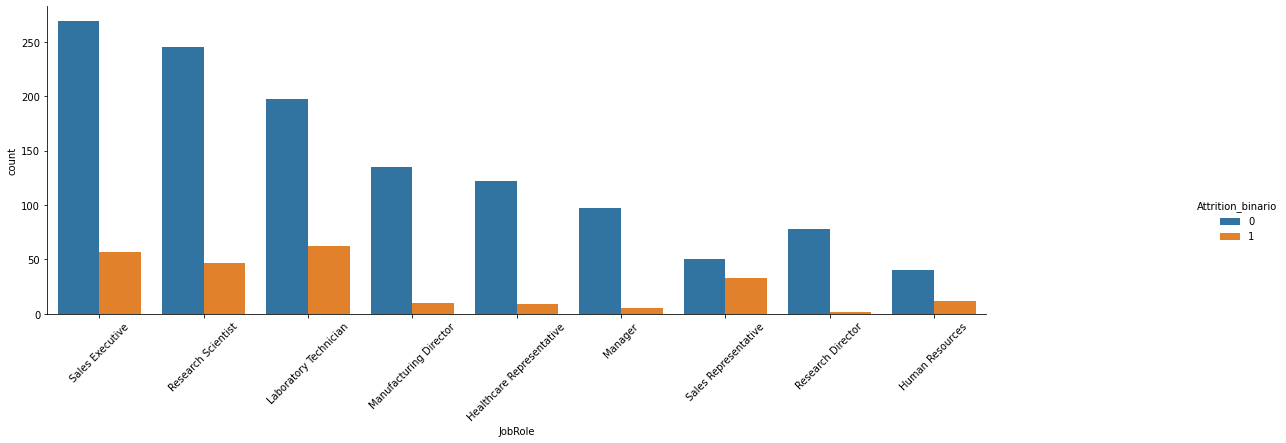

In [21]:
sns.catplot(data=df,kind="count",x="JobRole",hue="Attrition_binario")
plt.gcf().set_size_inches(20, 5)
plt.xticks(rotation=45)
#El puesto con mayor rotacion es el representante de ventas

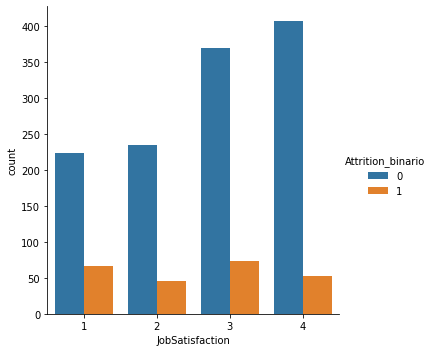

In [22]:
sns.catplot(data=df,kind="count",x="JobSatisfaction",hue="Attrition_binario")
#la satisfaccion en el trabajo no parece ser un motivo de renuncia

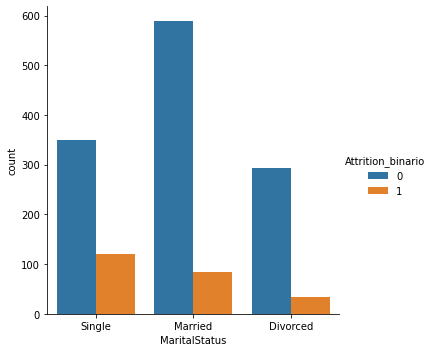

In [23]:
sns.catplot(data=df,kind="count",x="MaritalStatus",hue="Attrition_binario")
#al estar soltero eres más propenso a renunciar que el resto

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

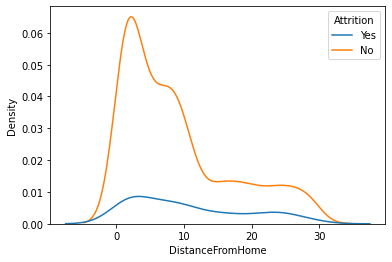

In [24]:
sns.kdeplot(data=df,x="DistanceFromHome",hue="Attrition")

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

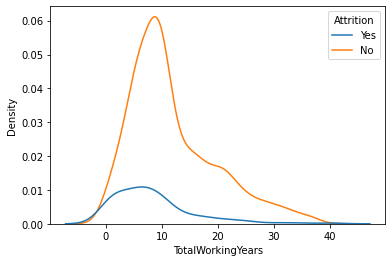

In [25]:
sns.kdeplot(data=df,x="TotalWorkingYears",hue="Attrition")

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

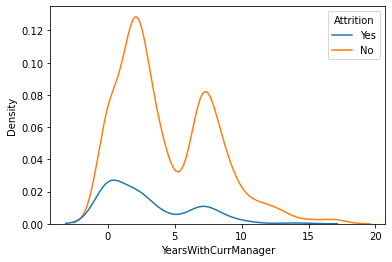

In [26]:
sns.kdeplot(data=df,x="YearsWithCurrManager",hue="Attrition")

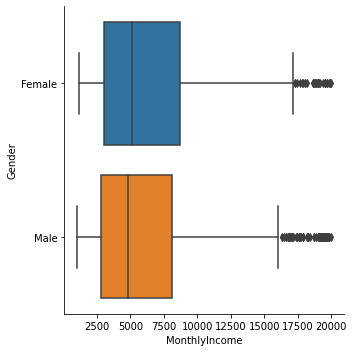

In [27]:
sns.catplot(data=df,kind="box",x="MonthlyIncome",y="Gender")
#no hay una discriminación en base al sexo sobre el ingreso mensual.

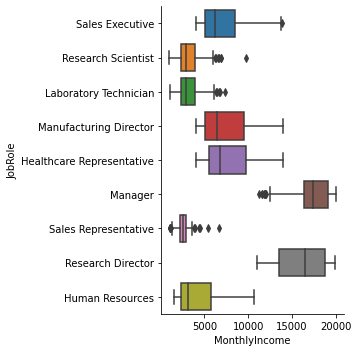

In [28]:
sns.catplot(data=df,kind="box",x="MonthlyIncome",y="JobRole")
#Justamente los representantes de ventas que más rotacion tienen, son los peor pagados

# Limpieza de datos - Premodelado

In [29]:
#Identificar las variables categoricas/discretas
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_binario,OverTime_binario
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0,0


In [30]:
#list(df.columns)
print("""
'Age' Numerica
'Attrition' Eliminar
'BusinessTravel' Categorica ok
'DailyRate' Numerica
'Department' Categorica ok
'DistanceFromHome' Numerica
'Education' Numerica?
'EducationField' Categorica ok
'EnvironmentSatisfaction' Numerica?
'Gender' Categorica ok
'HourlyRate' Numerica
'JobInvolvement' Numerica?
'JobLevel' Numerica?
'JobRole' Categorica ok
'JobSatisfaction' Numerica?
'MaritalStatus' Categorica ok
'MonthlyIncome' Numerica
'MonthlyRate' Numerica
'NumCompaniesWorked' Numerica
'OverTime' Eliminar
'PercentSalaryHike' Numerica
'PerformanceRating' Numerica?
'RelationshipSatisfaction' Numerica?
'StockOptionLevel' Numerica?
'TotalWorkingYears' Numerica
'TrainingTimesLastYear' Numerica
'WorkLifeBalance' Numerica?
'YearsAtCompany' Numerica
'YearsInCurrentRole' Numerica
'YearsSinceLastPromotion' Numerica
'YearsWithCurrManager' Numerica
'Attrition_binario' Y
'OverTime_binario' Numerica?
     """)


'Age' Numerica
'Attrition' Eliminar
'BusinessTravel' Categorica ok
'DailyRate' Numerica
'Department' Categorica ok
'DistanceFromHome' Numerica
'Education' Numerica?
'EducationField' Categorica ok
'EnvironmentSatisfaction' Numerica?
'Gender' Categorica ok
'HourlyRate' Numerica
'JobInvolvement' Numerica?
'JobLevel' Numerica?
'JobRole' Categorica ok
'JobSatisfaction' Numerica?
'MaritalStatus' Categorica ok
'MonthlyIncome' Numerica
'MonthlyRate' Numerica
'NumCompaniesWorked' Numerica
'OverTime' Eliminar
'PercentSalaryHike' Numerica
'PerformanceRating' Numerica?
'RelationshipSatisfaction' Numerica?
'StockOptionLevel' Numerica?
'TotalWorkingYears' Numerica
'TrainingTimesLastYear' Numerica
'WorkLifeBalance' Numerica?
'YearsAtCompany' Numerica
'YearsInCurrentRole' Numerica
'YearsSinceLastPromotion' Numerica
'YearsWithCurrManager' Numerica
'Attrition_binario' Y
'OverTime_binario' Numerica?
     


In [31]:
df.drop(["Attrition",'OverTime'],axis=1,inplace=True)

In [32]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_binario,OverTime_binario
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0,0
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0,0


In [33]:
df_cat = df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
df_cat = pd.get_dummies(df_cat,drop_first=False)
df_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [34]:
#df_numerical = df._get_numeric_data() en lugar de: , tambien funciona
df_numerical = df.drop(columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Attrition_binario'])
df_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_binario
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,1
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0


In [35]:
df_all = pd.concat([df_cat,df_numerical],axis=1)
df_all

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_binario
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0
1466,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0
1467,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,1
1468,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(df_all)

In [37]:
x

array([[0.        , 0.        , 1.        , ..., 0.        , 0.29411765,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.06666667, 0.41176471,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.17647059,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.47058824,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.06666667, 0.11764706,
        0.        ]])

In [38]:
y = df["Attrition_binario"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_binario, Length: 1470, dtype: int64

# Entrenamiento de modelos de ML

## Regresión Logística

In [39]:
#Vamos a crear nuestra data de entrenamiento y la de validación
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [40]:
from sklearn.linear_model import LogisticRegression
model_rl = LogisticRegression()
model_rl.fit(x_train,y_train)
y_pred_rl = model_rl.predict(x_test)

In [41]:
y_pred_rl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100* accuracy_score(y_test,y_pred_rl)))

Accuracy 89.40217391304348 %


<AxesSubplot:>

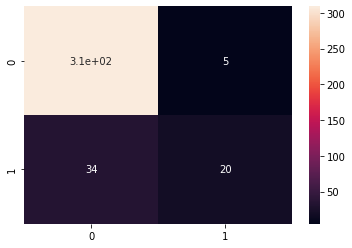

In [44]:
cm_rl = confusion_matrix(y_test,y_pred_rl)
sns.heatmap(cm_rl, annot=True)

In [45]:
cm_rl

array([[309,   5],
       [ 34,  20]], dtype=int64)

In [92]:
accuracy_rl = (cm_rl[0][0] + cm_rl[1][1]) / (cm_rl[0][0] + cm_rl[0][1] + cm_rl[1][0] + cm_rl[1][1])

precision_rl = cm_rl[0][0] /(cm_rl[0][0]+cm_rl[0][1])
recall_rl = cm_rl[0][0] / (cm_rl[0][0]+cm_rl[1][0])

precision2_rl= cm_rl[1][1] /(cm_rl[1][0]+cm_rl[1][1])
recall2_rl= cm_rl[1][1] / (cm_rl[0][1]+cm_rl[1][1])

print(accuracy_rl,precision_rl,recall_rl,precision2_rl,recall2_rl)

0.8940217391304348 0.9840764331210191 0.9008746355685131 0.37037037037037035 0.8


In [89]:
cm_rl[0][1],cm_rl[0][0]

(5, 309)

In [82]:
print(classification_report(y_pred_rl,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       343
           1       0.37      0.80      0.51        25

    accuracy                           0.89       368
   macro avg       0.68      0.85      0.72       368
weighted avg       0.94      0.89      0.91       368



## RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)

In [53]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

<AxesSubplot:>

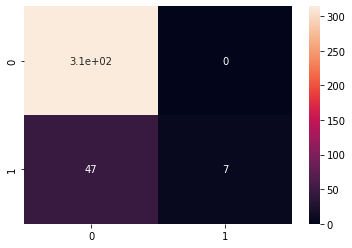

In [54]:
sns.heatmap(cm_rf,annot=True)

In [60]:
cm_rf

array([[314,   0],
       [ 47,   7]], dtype=int64)

In [61]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       361
           1       0.13      1.00      0.23         7

    accuracy                           0.87       368
   macro avg       0.56      0.93      0.58       368
weighted avg       0.98      0.87      0.92       368



In [96]:
accuracy_rf = (cm_rf[0][0] + cm_rf[1][1]) / (cm_rf[0][0] + cm_rf[0][1] + cm_rf[1][0] + cm_rf[1][1])

precision_rf = cm_rf[0][0] /(cm_rf[0][0]+cm_rf[0][1])
recall_rf = cm_rf[0][0] / (cm_rf[0][0]+cm_rf[1][0])

precision2_rf= cm_rf[1][1] /(cm_rf[1][0]+cm_rf[1][1])
recall2_rf= cm_rf[1][1] / (cm_rf[0][1]+cm_rf[1][1])

print(accuracy_rf,precision_rf,recall_rf,precision2_rf,recall2_rf)

0.8722826086956522 1.0 0.8698060941828255 0.12962962962962962 1.0


## Red Neuronal

In [63]:
import tensorflow as tf

In [64]:
model_rn = tf.keras.models.Sequential()
model_rn.add(tf.keras.layers.Dense(units=500,activation="relu",input_shape=(50,)))
model_rn.add(tf.keras.layers.Dense(units=500,activation="relu"))
model_rn.add(tf.keras.layers.Dense(units=500,activation="relu"))
model_rn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [65]:
model_rn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_rn.compile(optimizer="Adam",loss="binary_crossentropy",metrics=("accuracy"))
epochs_hist = model_rn.fit(x_train,y_train,epochs =100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.4477 - accuracy: 0.8330
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3420 - accuracy: 0.8475
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2964 - accuracy: 0.8775
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.8984
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2240 - accuracy: 0.9093
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1993 - accuracy: 0.9211
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2205 - accuracy: 0.9129
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1738 - accuracy: 0.9356
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1115 - accuracy: 0.9646
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9773
Epoch 11/

23/23 [==============================] - 0s 4ms/step - loss: 4.9775e-06 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 0s 4ms/step - loss: 4.7310e-06 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 4ms/step - loss: 4.4528e-06 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 4ms/step - loss: 4.2548e-06 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 4ms/step - loss: 4.0728e-06 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 5ms/step - loss: 3.9160e-06 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 4ms/step - loss: 3.7608e-06 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 4ms/step - loss: 3.5872e-06 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 4ms/step - loss: 3.4407e-06 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 4ms/step - loss: 3.3

In [68]:
y_pred_rn = model_rn.predict(x_test)
y_pred_rn

12/12 [==============================] - 0s 2ms/step


array([[9.99617279e-01],
       [4.03354994e-09],
       [6.85508894e-08],
       [2.19409616e-04],
       [2.43964876e-10],
       [2.61075043e-13],
       [1.05824827e-13],
       [8.15764557e-14],
       [1.47447020e-01],
       [7.68086116e-13],
       [3.99857820e-11],
       [3.74723442e-07],
       [1.03435756e-04],
       [1.63347321e-03],
       [8.61509619e-09],
       [1.80889174e-07],
       [1.94721281e-07],
       [4.95920254e-13],
       [9.99994457e-01],
       [1.62678759e-10],
       [9.99251127e-01],
       [3.02898108e-16],
       [3.05991149e-10],
       [1.33060079e-20],
       [9.98151243e-01],
       [8.26668274e-03],
       [8.61690364e-09],
       [1.13160468e-05],
       [1.00000000e+00],
       [8.43231142e-18],
       [9.67192477e-07],
       [3.56763894e-06],
       [1.16423635e-05],
       [9.80975747e-01],
       [1.87902527e-10],
       [2.76538965e-11],
       [1.02525473e-01],
       [9.99999464e-01],
       [2.38843626e-07],
       [9.60970940e-14],


In [69]:
y_pred_rn = y_pred_rn > 0.5
y_pred_rn

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [

In [70]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

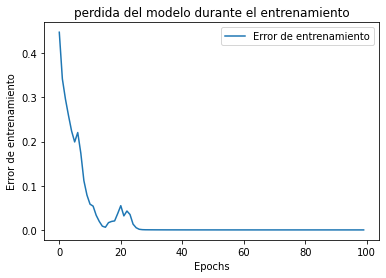

In [71]:
plt.plot(epochs_hist.history["loss"])
plt.title("perdida del modelo durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de entrenamiento")
plt.legend(["Error de entrenamiento"])

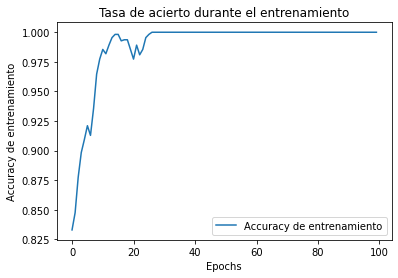

In [72]:
plt.plot(epochs_hist.history["accuracy"])
plt.title("Tasa de acierto durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de entrenamiento")
plt.legend(["Accuracy de entrenamiento"])

<AxesSubplot:>

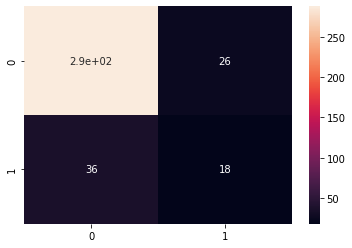

In [73]:
cm_rn = confusion_matrix(y_test,y_pred_rn)
sns.heatmap(cm_rn,annot=True)

In [74]:
cm_rn

array([[288,  26],
       [ 36,  18]], dtype=int64)

In [97]:
print(classification_report(y_pred_rn,y_test))

              precision    recall  f1-score   support

       False       0.92      0.89      0.90       324
        True       0.33      0.41      0.37        44

    accuracy                           0.83       368
   macro avg       0.63      0.65      0.64       368
weighted avg       0.85      0.83      0.84       368



# Conclusiones